In [3]:
%matplotlib inline
import os, import_ipynb
from TVRegression2 import *
import numpy as np
from scipy.signal import lfilter
import statsmodels.api as sm
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = scipy.io.loadmat('fMRIdata/subject1.mat')

In [11]:
region_name = ["LLP" "mPFC" "PCC" "RLP"]

In [12]:
llp = data['mts'][0][0]
mpfc = data['mts'][1][0]
pcc = data['mts'][2][0]
rlp = data['mts'][3][0]

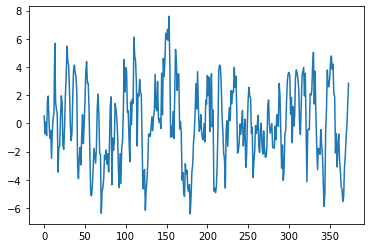

In [14]:
plt.plot(llp)

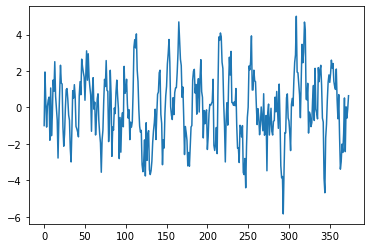

In [29]:
plt.plot(rlp)

In [15]:
mod_tvr2 = TVRegression2(rlp, llp)

In [16]:
res_tvr2 = mod_tvr2.fit()

In [17]:
print(res_tvr2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  374
Model:                  TVRegression2   Log Likelihood                -685.443
Date:                Wed, 14 Sep 2022   AIC                           1380.887
Time:                        12:11:12   BIC                           1400.508
Sample:                             0   HQIC                          1388.677
                                - 374                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0196      0.078      0.251      0.801      -0.133       0.172
var.e           1.6461      0.126     13.015      0.000       1.398       1.894
var.x.coeff     0.0425      0.017      2.557    

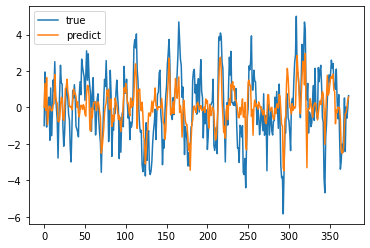

In [32]:
plt.plot(rlp,label="true")
plt.plot(res_tvr2.predict(),label="predict")
plt.legend()

In [33]:
res_tvr2.filter_results.design

array([[[ 5.31781912e-01, -7.41428316e-01,  8.47183764e-02,
         -8.73092711e-01,  1.60058105e+00,  1.93921256e+00,
         -1.45377126e-02, -1.05478597e+00, -5.03826499e-01,
         -2.47438669e+00, -5.50335109e-01,  3.82537931e-01,
          6.68257356e-01,  5.68417263e+00,  1.54056275e+00,
          9.90960240e-01,  7.09241092e-01, -3.45805550e+00,
         -1.69866157e+00, -1.62783420e+00,  3.23589534e-01,
          1.95506930e+00,  1.45827961e+00, -1.60059297e+00,
         -1.83391654e+00, -2.76069492e-01,  2.02286863e+00,
          3.37344694e+00,  5.48321438e+00,  4.38199854e+00,
          4.11739063e+00,  2.39081335e+00,  3.32951173e-02,
         -1.22029972e+00, -7.36969173e-01,  1.82796299e+00,
          3.74291348e+00,  4.13228464e+00,  3.59568644e+00,
          3.30912614e+00,  2.25722313e+00, -2.93663788e+00,
         -3.91611457e+00, -2.42183518e+00, -1.71196151e+00,
         -2.94112325e+00, -8.70137691e-01,  6.11816764e-01,
         -1.42394984e+00, -9.57238227e-0

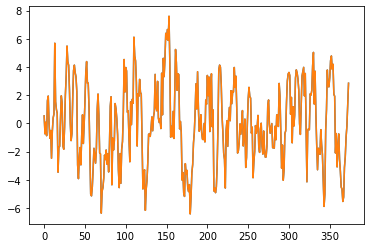

In [38]:
plt.plot(res_tvr2.filter_results.design[0][0])
plt.plot(llp)

In [37]:
res_tvr2.filter_results.obs_intercept

array([[0.01959408]])

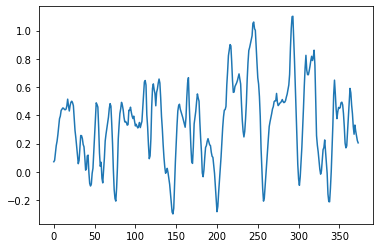

In [47]:
plt.plot(res_tvr2.smoothed_state[0])

In [48]:
beta = res_tvr2.smoothed_state[0]

In [49]:
y_predict = 0.01959408 + beta*llp

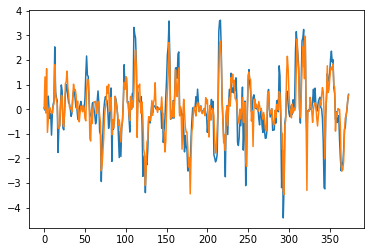

In [52]:
plt.plot(y_predict)
plt.plot(res_tvr2.predict(),label="predict")

In [54]:
# reverse direction
mod_tvr2_rev = TVRegression2(llp, rlp)
res_tvr2_rev = mod_tvr2_rev.fit()
print(res_tvr2_rev.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  374
Model:                  TVRegression2   Log Likelihood                -839.022
Date:                Wed, 14 Sep 2022   AIC                           1688.043
Time:                        14:17:16   BIC                           1707.665
Sample:                             0   HQIC                          1695.834
                                - 374                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0498      0.112      0.446      0.656      -0.169       0.269
var.e           3.8500      0.299     12.890      0.000       3.265       4.435
var.x.coeff     0.1959      0.070      2.793    

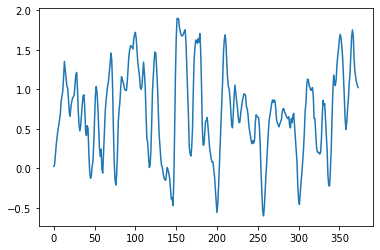

In [55]:
plt.plot(res_tvr2_rev.smoothed_state[0])

In [98]:
mod_sarimax = sm.tsa.statespace.SARIMAX(rlp, llp, trend="c",order=(1,0,0), time_varying_regression=True, mle_regression=False)
res_sarimax = mod_sarimax.fit(maxiter=500)

In [99]:
print(res_sarimax.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  374
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -558.201
Date:                Wed, 14 Sep 2022   AIC                           1124.403
Time:                        20:40:21   BIC                           1140.089
Sample:                             0   HQIC                          1130.631
                                - 374                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0036      0.057     -0.063      0.950      -0.114       0.107
ar.L1          0.7282      0.037     19.930      0.000       0.657       0.800
var.x1      5.349e-10    3.3e-05   1.62e-05      1.0

In [76]:
res_sarimax.states.filtered.T

array([[-8.50355810e-10,  2.27975905e-01,  4.91118659e-01, ...,
        -4.99278167e-01, -6.72774205e-01, -5.62077262e-01],
       [-5.16644203e-11,  2.00603690e-02,  2.54983309e-02, ...,
         3.75032979e-02, -4.17154688e-02, -5.61863879e-02],
       [-1.86873160e+00, -2.32031562e+00, -2.21610252e+00, ...,
         4.25057664e-01,  4.24548546e-01,  4.24431512e-01]])

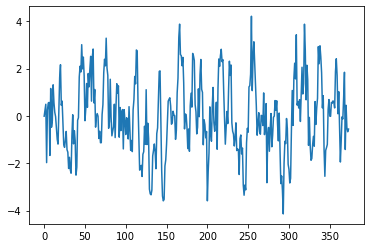

In [104]:
plt.plot(res_sarimax.states.filtered.T[0])

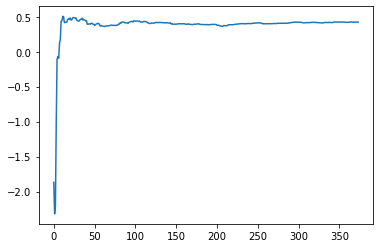

In [86]:
plt.plot(res_sarimax.states.filtered.T[1])

(array([ 1.,  2.,  4.,  5.,  5.,  6.,  9.,  7.,  6., 23., 22., 24., 28.,
        30., 29., 24., 31., 18., 16., 13.,  9., 15., 13., 15.,  8.,  4.,
         3.,  1.,  2.,  1.]),
 array([-4.1419153 , -3.86353892, -3.58516253, -3.30678615, -3.02840976,
        -2.75003338, -2.47165699, -2.19328061, -1.91490422, -1.63652784,
        -1.35815145, -1.07977506, -0.80139868, -0.52302229, -0.24464591,
         0.03373048,  0.31210686,  0.59048325,  0.86885963,  1.14723602,
         1.4256124 ,  1.70398879,  1.98236518,  2.26074156,  2.53911795,
         2.81749433,  3.09587072,  3.3742471 ,  3.65262349,  3.93099987,
         4.20937626]),
 <BarContainer object of 30 artists>)

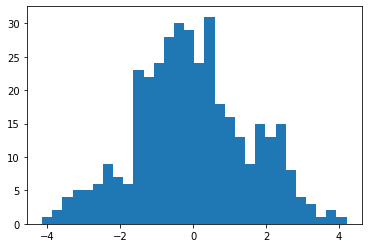

In [88]:
plt.hist(res_sarimax.states.filtered.T[0],bins=30)

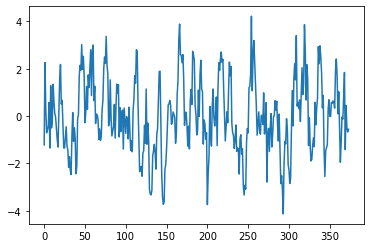

In [105]:
plt.plot(res_sarimax.states.smoothed.T[0])